In [150]:
import json
import requests
from skimage import io
import pandas as pd
import requests 
from PIL import Image
from rembg import remove

cookies = {
    '_ga': 'GA1.1.847399952.1685644170',
    'trc_cookie_storage': 'taboola%2520global%253Auser-id%3D30b2cedf-0375-49f9-8ece-fd80c588bbfa-tuct9fb461d',
    '_ga_0VVD9VP56V': 'GS1.1.1686418081.2.0.1686418242.60.0.0',
}

headers = {
    'authority': 'shoesoflasso.com',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # 'cookie': '_ga=GA1.1.847399952.1685644170; trc_cookie_storage=taboola%2520global%253Auser-id%3D30b2cedf-0375-49f9-8ece-fd80c588bbfa-tuct9fb461d; _ga_0VVD9VP56V=GS1.1.1686418081.2.0.1686418242.60.0.0',
    'sec-ch-ua': '"Chromium";v="112", "Google Chrome";v="112", "Not:A-Brand";v="99"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'none',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
}



In [151]:
import re

def convert_string(string):
    """Converts a string to shoe_02 format using regex.

    Args:
    string: The string to convert.

    Returns:
    The converted string.
    """

    shoe, num = string.split('_')
    return 'shoe_' + str(num).zfill(2)

In [153]:
df = pd.read_csv('./data/lasso-sneaks.csv')
df = df.dropna(subset=['Shoe Thumbnail'])
df = df.drop_duplicates(subset=['Shoe Thumbnail'], keep='first')
df = df.drop_duplicates(subset=['Shoe Name'], keep='first')
df = df.drop(index=9)
df['id'] = df['id'].apply(lambda x: convert_string(x))
print(df.shape)
df

(24, 6)


,Episode String,Season,Episode,Shoe Name,Shoe Thumbnail,id
2,season-1-episode-2,1,2,Jordan Zoom Zero Gravity,https://shoesoflasso.com/wp-content/uploads/20...,shoe_02
3,season-1-episode-2,1,2,Jordan React Havoc Paris Saint-Germain (PSG),https://shoesoflasso.com/wp-content/uploads/20...,shoe_03
4,season-1-episode-3,1,3,Nike Tanjun in Midnight Navy/Game Royal/White,https://shoesoflasso.com/wp-content/uploads/20...,shoe_04
5,season-1-episode-5,1,5,Nike Air Huarache Premium ‘Varsity Jacket’ in Red,https://shoesoflasso.com/wp-content/uploads/20...,shoe_05
7,season-1-episode-6,1,6,Odyssey React 2 Flyknit ‘Black Racer Blue’,https://shoesoflasso.com/wp-content/uploads/20...,shoe_07
11,season-1-episode-10,1,10,JIMMY CHOO Diamond X Strap/F Leather Sneakers,https://shoesoflasso.com/wp-content/uploads/20...,shoe_11
12,season-1-episode-10,1,10,Nike Blazer Low X ‘White Light Photo Blue’,https://shoesoflasso.com/wp-content/uploads/20...,shoe_12
13,season-1-episode-10,1,10,Eric Koston x Air Jordan 1 Low SB ‘Powder Blue’,https://shoesoflasso.com/wp-content/uploads/20...,shoe_13
14,season-1-episode-10,1,10,Nike Waffle One Summer of Sports Pack,https://shoesoflasso.com/wp-content/uploads/20...,shoe_14
15,season-1-episode-10,1,10,ASIC Mexico 66 ‘Kill Bill’,https://shoesoflasso.com/wp-content/uploads/20...,shoe_15


In [154]:
df.to_csv('./data/lasso-sneaks-cleaned.csv', index=False)

In [129]:
print(df['Shoe Thumbnail'].to_list())

['https://shoesoflasso.com/wp-content/uploads/2021/10/Jordan-Zoom-Zero-Gravity-Grey-Fog-Obsidian.png', 'https://shoesoflasso.com/wp-content/uploads/2021/10/Paris-Saint-Germain-x-Jordan-React-Havoc.png', 'https://shoesoflasso.com/wp-content/uploads/2021/10/tanjun-mens-shoe-profile-1-1024x483.jpeg', 'https://shoesoflasso.com/wp-content/uploads/2021/10/18-10-2018_nike_airhuaracherunpremium_redsailblue_purple_704830-602_mg_7-copy.png', 'https://shoesoflasso.com/wp-content/uploads/2021/11/AH1015_011.png.png', 'https://shoesoflasso.com/wp-content/uploads/2021/10/Eric-Conston-Air-Jordan-1-low-1024x454.jpeg', 'https://shoesoflasso.com/wp-content/uploads/2023/06/Screen-Shot-2023-06-05-at-6.21.58-PM-1024x591.png', 'https://shoesoflasso.com/wp-content/uploads/2023/05/DN6995_101.png-1024x418.webp', 'https://shoesoflasso.com/wp-content/uploads/2023/05/534688_08.jpg-1024x362.webp', 'https://shoesoflasso.com/wp-content/uploads/2023/05/806484_08-1024x333.webp', 'https://shoesoflasso.com/wp-content/upl

In [155]:
from skimage import io
import matplotlib.pyplot as plt
import re

for i, row in df.iterrows():
    img_url = row['Shoe Thumbnail']
    img_name = row['id']
    extension = img_url.split('.')[-1]
    response = requests.get(img_url, cookies=cookies, headers=headers)
    fpath = f'{img_name}.{extension}'
    with open(f'wp-images/{fpath}', 'wb') as f:
        f.write(response.content)

In [156]:
import os
path = './wp-images'
dir_list = sorted(os.listdir(path))
imgs = []
for f in dir_list:
    im = Image.open(f"wp-images/{f}").convert("RGB")
    im = remove(im)
    imgs.append(im)

/opt/homebrew/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [157]:
print(len(imgs))

24


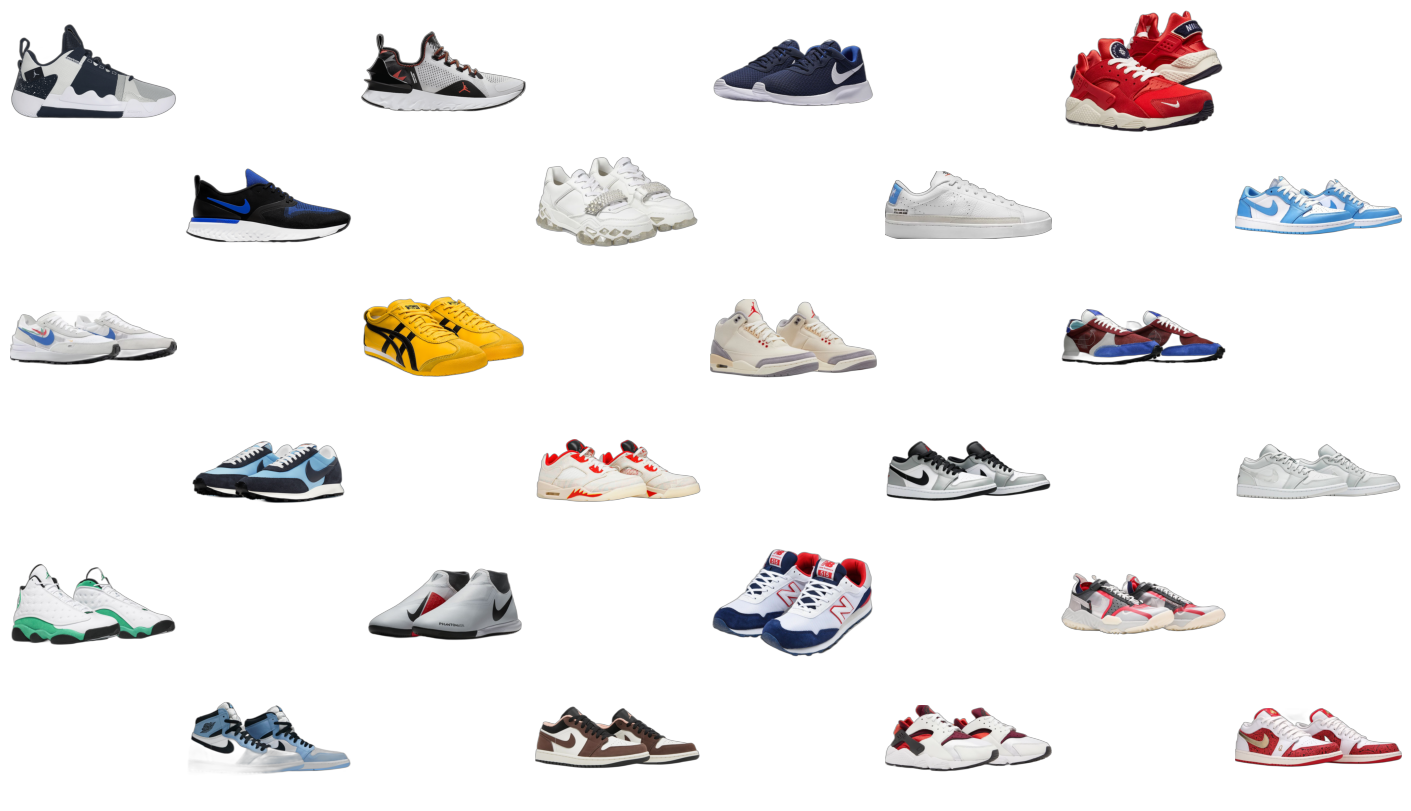

In [160]:
n_rows, n_cols = (6, 8)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 8), layout='constrained')
count = 0
for i in range(n_rows):
    for j in range(n_cols):
        axs[i, j].axis("off")
        if (i % 2 == 0 and j % 2 == 0) or (i % 2 == 1 and j % 2 == 1):
            im = imgs[count]
            axs[i, j].imshow(im)
            count += 1
plt.show()  

In [141]:
fig.savefig('./mosaics/ted-sneaker-portfolio.png')